In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

In [3]:
# read the data
mushroom = pd.read_csv('mushrooms.csv')
# show first five records from the data
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Dataset Information: Meaning of different values in different columns.
Attribute Information:
classes: edible=e, poisonous=p
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [4]:
mushroom.shape

(8124, 23)

In [5]:
# datatypes present in our data
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
# Descriptive statistics of the data
mushroom.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
# Concise summary of the data
mushroom.info

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [8]:
for i in mushroom.columns:
    missing = mushroom[i][mushroom[i]=='?'].count()
    if missing != 0:
        print(i, missing)


stalk-root 2480


In [9]:
mushroom['stalk-root'] = mushroom['stalk-root'].replace(to_replace='?',value=np.nan)

In [10]:
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mushroom['stalk-root'] = impute.fit_transform(mushroom[['stalk-root']])
# Lets check how many unique values are present in each columns
for i in mushroom.columns:
    print(i,mushroom[i].nunique())

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


In [11]:
mushroom = mushroom.drop(['veil-type'],axis=1)
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
# Let's check the counts of classes present in Target column "class" 
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

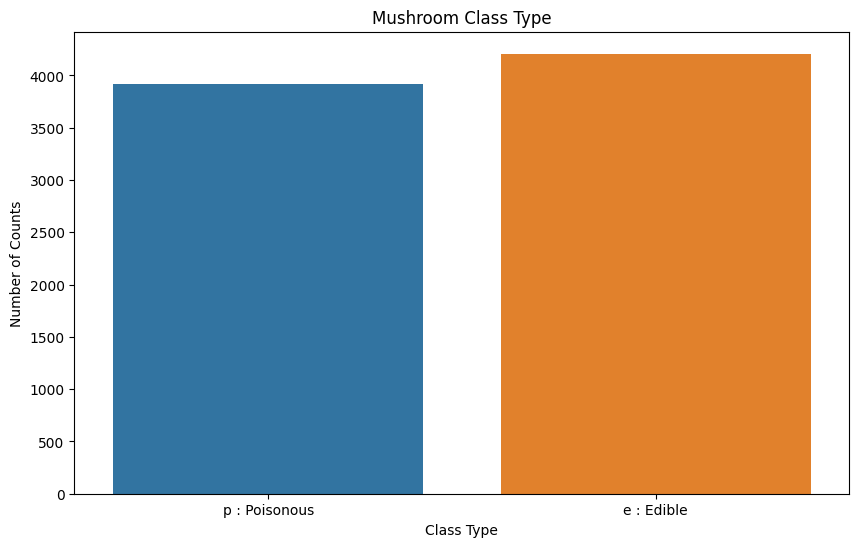

In [13]:
# let's visualize the target column 'class'

plt.figure(figsize=(10,6))
mush_class = sns.countplot(x='class',data=mushroom)
plt.xlabel('Class Type')
plt.ylabel('Number of Counts')
mush_class.set_xticklabels(['p : Poisonous','e : Edible'])
plt.title('Mushroom Class Type')
plt.show()

In [14]:
# Let's check count of classes present in 'cap-surface' column
CapSurface = mushroom['cap-surface'].value_counts()

# Let's see each type with the counts of target class column
mushroom.groupby(['cap-surface'])['class'].value_counts()

cap-surface  class
f            e        1560
             p         760
g            p           4
s            p        1412
             e        1144
y            p        1740
             e        1504
Name: class, dtype: int64

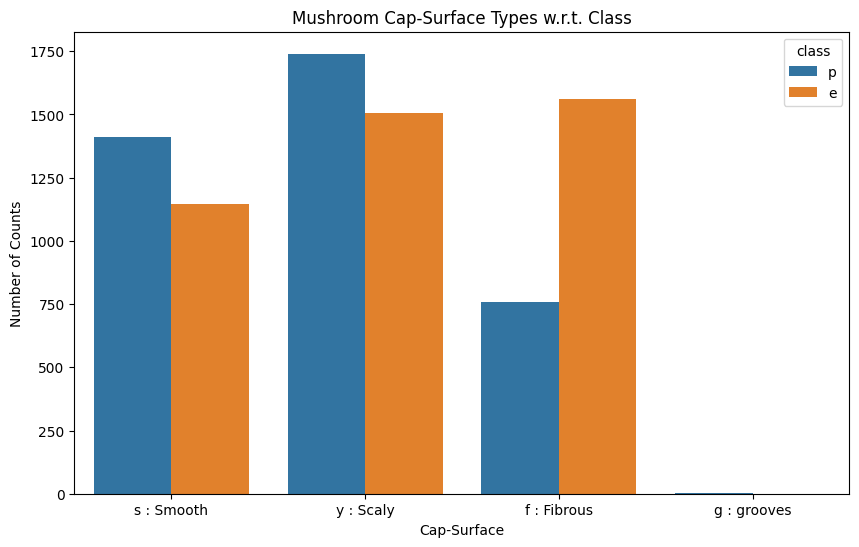

In [15]:
# Let's visualize the feature column 'cap-surface' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
cap_surface = sns.countplot(x='cap-surface',data=mushroom,hue='class')
plt.xlabel('Cap-Surface')
plt.ylabel('Number of Counts')
cap_surface.set_xticklabels(['s : Smooth', 'y : Scaly', 'f : Fibrous', 'g : grooves'])
plt.title('Mushroom Cap-Surface Types w.r.t. Class')
plt.show()

In [16]:
# Let's check count of classes present in 'bruises' column
Bruises = mushroom['bruises'].value_counts()
# Let's see each type with the counts of target class column
mushroom.groupby(['bruises'])['class'].value_counts()

bruises  class
f        p        3292
         e        1456
t        e        2752
         p         624
Name: class, dtype: int64

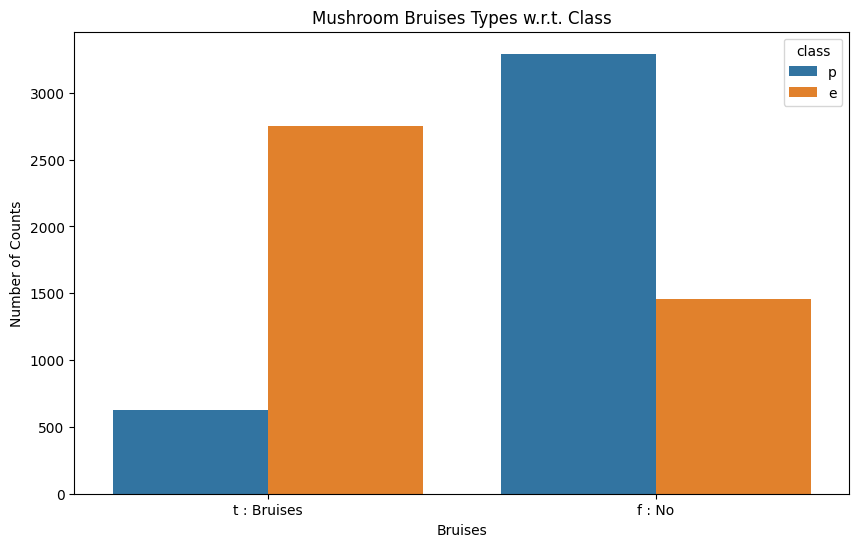

In [17]:
# Let's visualize the feature column 'bruises' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
bruises = sns.countplot(x='bruises',data=mushroom,hue='class')
plt.xlabel('Bruises')
plt.ylabel('Number of Counts')
bruises.set_xticklabels(['t : Bruises', 'f : No'])
plt.title('Mushroom Bruises Types w.r.t. Class')
plt.show()

In [18]:
# Let's check count of classes present in 'bruises' column
GillSpacing = mushroom['gill-spacing'].value_counts()

# Let's see each type with the counts of target class column
mushroom.groupby(['gill-spacing'])['class'].value_counts()

gill-spacing  class
c             p        3804
              e        3008
w             e        1200
              p         112
Name: class, dtype: int64

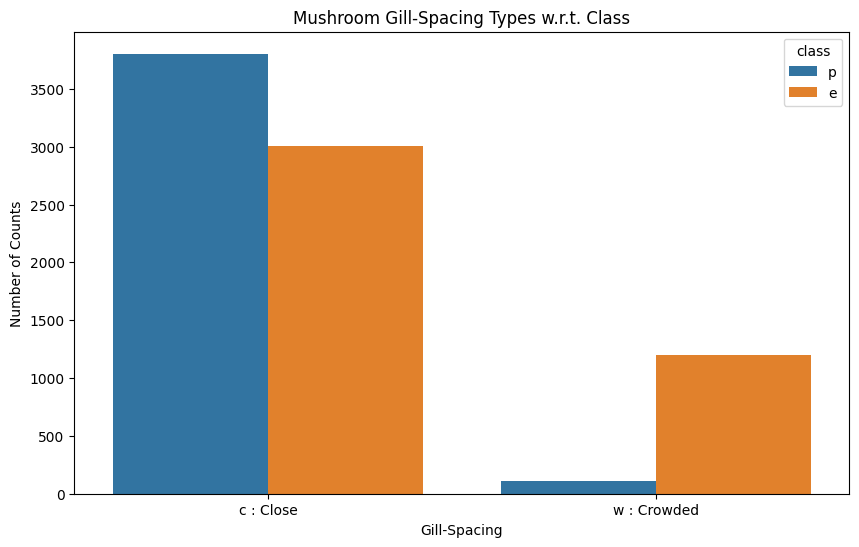

In [19]:
# Let's visualize the feature column 'gill-spacing' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
gill_spacing = sns.countplot(x='gill-spacing',data=mushroom,hue='class')
plt.xlabel('Gill-Spacing')
plt.ylabel('Number of Counts')
gill_spacing.set_xticklabels(['c : Close', 'w : Crowded'])
plt.title('Mushroom Gill-Spacing Types w.r.t. Class')
plt.show()

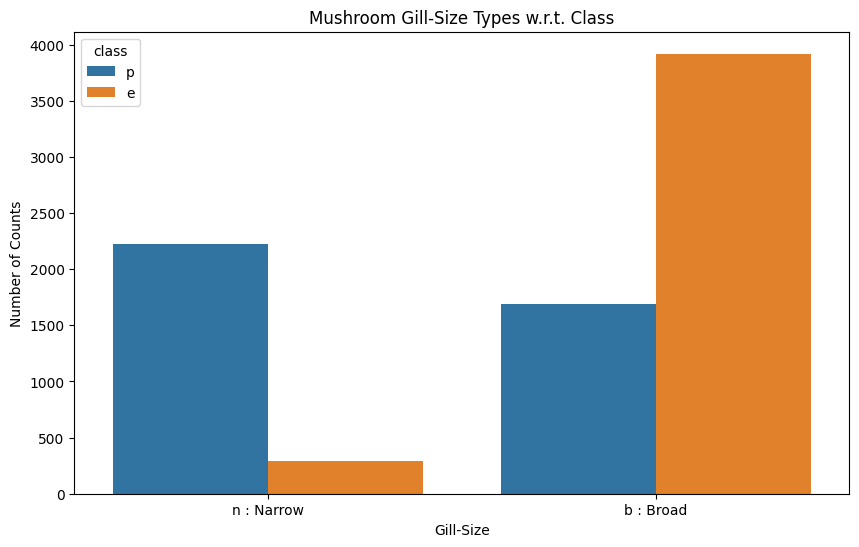

In [20]:
GillSize = mushroom['gill-size'].value_counts()

# Let's see each type with the counts of target class column
mushroom.groupby(['gill-size'])['class'].value_counts()
# Let's visualize the feature column 'gill-size' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
gill_size = sns.countplot(x='gill-size',data=mushroom,hue='class')
plt.xlabel('Gill-Size')
plt.ylabel('Number of Counts')
gill_size.set_xticklabels(['n : Narrow', 'b : Broad'])
plt.title('Mushroom Gill-Size Types w.r.t. Class')
plt.show()

In [21]:
# Let's check count of classes present in 'gill-color' column
GillColor = mushroom['gill-color'].value_counts()

# Let's see each type with the counts of target class column
mushroom.groupby(['gill-color'])['class'].value_counts()

gill-color  class
b           p        1728
e           e          96
g           p         504
            e         248
h           p         528
            e         204
k           e         344
            p          64
n           e         936
            p         112
o           e          64
p           e         852
            p         640
r           p          24
u           e         444
            p          48
w           e         956
            p         246
y           e          64
            p          22
Name: class, dtype: int64

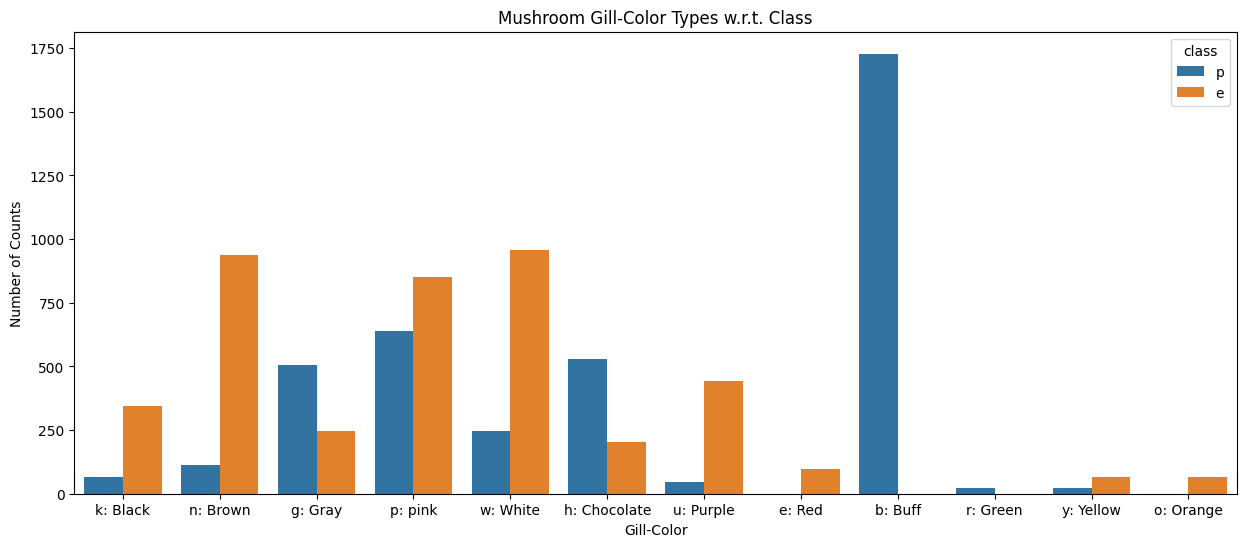

In [22]:
# Let's visualize the feature column 'gill-color' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
gill_color = sns.countplot(x='gill-color',data=mushroom,hue='class')
plt.xlabel('Gill-Color')
plt.ylabel('Number of Counts')
gill_color.set_xticklabels(['k: Black', 'n: Brown', 'g: Gray', 'p: pink', 'w: White', 
                           'h: Chocolate', 'u: Purple', 'e: Red', 'b: Buff', 'r: Green', 
                           'y: Yellow', 'o: Orange'])
plt.title('Mushroom Gill-Color Types w.r.t. Class')
plt.show()

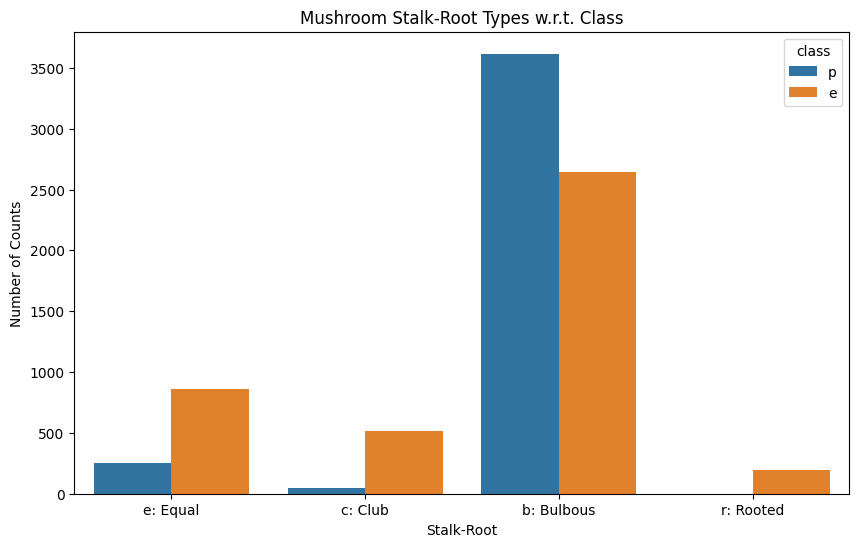

In [23]:
# Let's check count of classes present in 'stalk-root' column
StalkRoot = mushroom['stalk-root'].value_counts()

# Let's see each type with the counts of target class column
mushroom.groupby(['stalk-root'])['class'].value_counts()

# Let's visualize the feature column 'stalk-root' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
stalk_root = sns.countplot(x='stalk-root',data=mushroom,hue='class')
plt.xlabel('Stalk-Root')
plt.ylabel('Number of Counts')
stalk_root.set_xticklabels(['e: Equal', 'c: Club', 'b: Bulbous', 'r: Rooted'])
plt.title('Mushroom Stalk-Root Types w.r.t. Class')
plt.show()

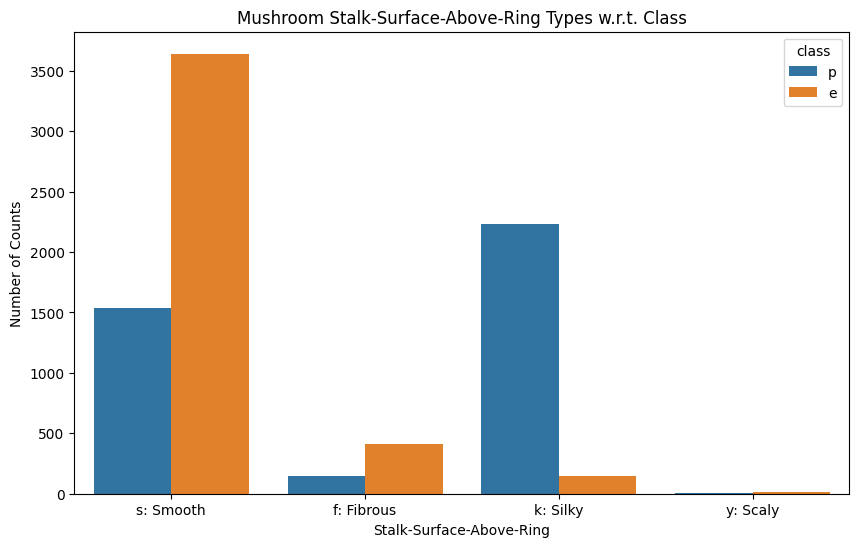

In [24]:
# Let's check count of classes present in 'stalk-surface-above-ring' column
StalkSurfaceAboveRing = mushroom['stalk-surface-above-ring'].value_counts()

# Let's see each type with the counts of target class column
mushroom.groupby(['stalk-surface-above-ring'])['class'].value_counts()

# Let's visualize the feature column 'stalk-surface-above-ring' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
stalk_surface_above_ring = sns.countplot(x='stalk-surface-above-ring',data=mushroom,hue='class')
plt.xlabel('Stalk-Surface-Above-Ring')
plt.ylabel('Number of Counts')
stalk_surface_above_ring.set_xticklabels(['s: Smooth', 'f: Fibrous', 'k: Silky', 'y: Scaly'])
plt.title('Mushroom Stalk-Surface-Above-Ring Types w.r.t. Class')
plt.show()

In [25]:
# First we will map our target column to 0 and 1 values 
mushroom['class'] = mushroom['class'].map({'p':0,'e':1})
mushroom['class'].value_counts()

# Now we will split our data into independent features - X and dependent target - y.

X = mushroom.drop(['class'],axis=1) # independent features
y = mushroom['class'] # target 
# Since our data is of categorical type we will use LabelEncoder to convert it into numerical.

# create an instance of label encoder 
le = LabelEncoder()
# using label encoder to transform independent features
X = X.apply(le.fit_transform)
# Let's take a look at our data
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


Feature 0: 9.263320
Feature 1: 160.254363
Feature 2: 5.897075
Feature 3: 919.925332
Feature 4: 65.961427
Feature 5: 2.420369
Feature 6: 601.552552
Feature 7: 1261.698364
Feature 8: 4481.101411
Feature 9: 28.658561
Feature 10: 1032.181093
Feature 11: 164.582402
Feature 12: 155.900921
Feature 13: 88.828475
Feature 14: 84.771468
Feature 15: 3.888454
Feature 16: 19.772966
Feature 17: 1445.464235
Feature 18: 293.310364
Feature 19: 237.485196
Feature 20: 549.245823


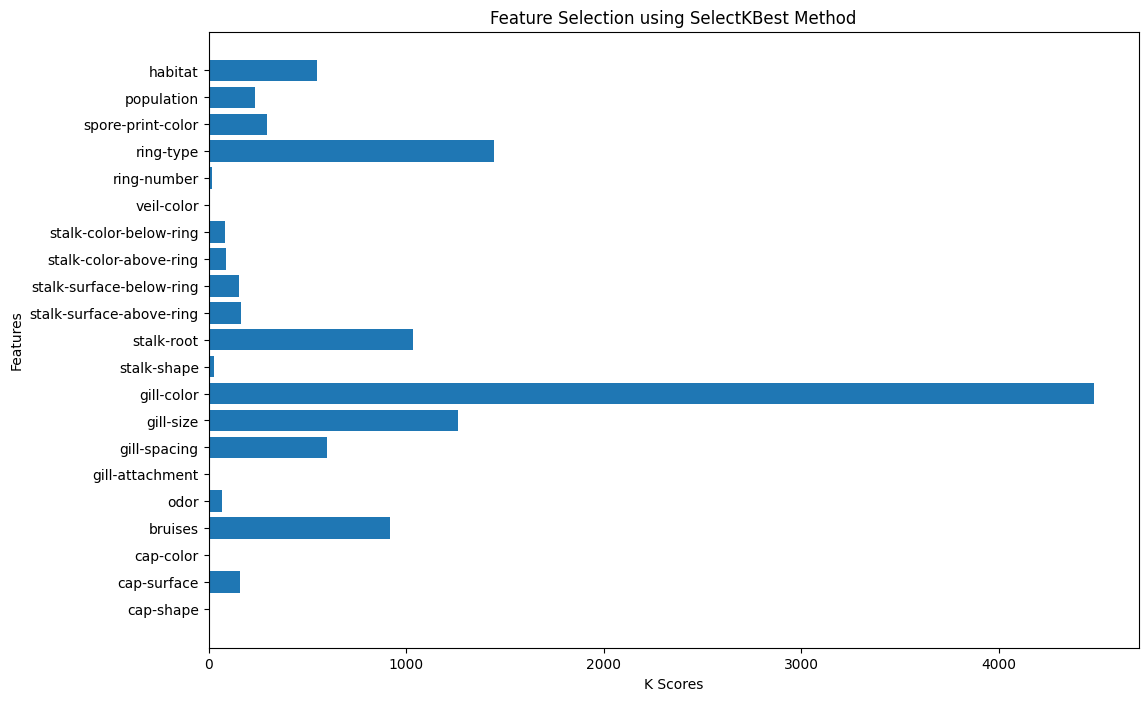

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Now we will use feature selection to find out best features to use for our model. For this purpose we will use SelectKBest method with score_func as chi2

fs = SelectKBest(score_func=chi2, k ='all')
# fitting train and test data
fs.fit(X_train, y_train)

# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
# On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(12, 8))
plt.barh([i for i in range(len(fs.scores_))], fs.scores_)
plt.ylabel('Features')
plt.xlabel('K Scores')
plt.yticks(ticks=range(0,21), labels=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
            'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 
            'population', 'habitat'])
plt.title('Feature Selection using SelectKBest Method')
plt.show()

In [28]:
X_train.columns
# After carefully analyzing above figure, we can now drop columns which are not necessary for our calculation.

X_train_new = X_train.drop(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 
                           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                           'ring-number'], axis=1)

In [29]:
# check dimensions of new train data
X_train_new.shape

# show first 5 records
X_train_new.head()

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
3887,2,0,0,1,5,0,2,2,4,3,3,0
4119,0,0,0,0,3,0,1,1,2,1,4,1
1600,3,1,0,0,5,0,2,2,4,2,5,0
4988,3,0,0,0,7,0,1,1,2,1,5,4
6757,3,0,0,1,0,0,2,1,0,7,4,0


In [30]:
# drop unnecessary columns from test data also
X_test_new = X_test.drop(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 
                           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                           'ring-number'], axis=1)
# check dimensions of new test data
print(X_test_new.shape)

# show first 5 records
X_test_new.head()

(2031, 12)


,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
1971,0,0,1,0,3,2,2,0,0,3,3,1
6654,2,0,0,1,0,0,2,2,0,7,4,2
5606,3,0,0,1,0,0,1,2,0,7,4,2
3332,3,1,0,0,5,0,2,2,4,3,5,0
6988,2,0,0,1,0,0,2,2,0,7,4,2


In [31]:
# create an instance of Standard Scaler
SS = StandardScaler()
# applying transformation on train data
X_train_scaled = pd.DataFrame(SS.fit_transform(X_train_new),columns=X_train_new.columns)
# Let's see how our data looks
X_train_scaled

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,0.138035,-0.844940,-0.438864,1.506246,0.045689,-0.506699,0.684699,0.587742,0.952434,-0.253406,-0.511106,-0.874755
1,-1.487180,-0.844940,-0.438864,-0.663902,-0.516696,-0.506699,-0.923578,-0.889614,-0.156313,-1.093678,0.281707,-0.292191
2,0.950643,1.183516,-0.438864,-0.663902,0.045689,-0.506699,0.684699,0.587742,0.952434,-0.673542,1.074519,-0.874755
3,0.950643,-0.844940,-0.438864,-0.663902,0.608073,-0.506699,-0.923578,-0.889614,-0.156313,-1.093678,1.074519,1.455504
4,0.950643,-0.844940,-0.438864,1.506246,-1.360273,-0.506699,0.684699,-0.889614,-1.265060,1.427139,0.281707,-0.874755
...,...,...,...,...,...,...,...,...,...,...,...,...
6088,0.950643,-0.844940,-0.438864,1.506246,-1.360273,-0.506699,-0.923578,0.587742,-1.265060,1.427139,0.281707,1.455504
6089,0.950643,1.183516,-0.438864,-0.663902,1.451650,-0.506699,0.684699,0.587742,-1.265060,1.427139,-2.096730,2.620633
6090,0.950643,1.183516,-0.438864,-0.663902,1.451650,3.205505,0.684699,2.065097,0.952434,-0.253406,1.074519,1.455504
6091,0.138035,-0.844940,-0.438864,1.506246,-1.360273,-0.506699,0.684699,0.587742,-1.265060,1.427139,0.281707,1.455504


In [32]:
# applying the same transformations on test data
X_test_scaled = pd.DataFrame(SS.transform(X_test_new),columns=X_test_new.columns)
# let's see how our data looks
X_test_scaled

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,-1.487180,-0.844940,2.278612,-0.663902,-0.516696,1.968104,0.684699,-2.366969,-1.265060,-0.253406,-0.511106,-0.292191
1,0.138035,-0.844940,-0.438864,1.506246,-1.360273,-0.506699,0.684699,0.587742,-1.265060,1.427139,0.281707,0.290374
2,0.950643,-0.844940,-0.438864,1.506246,-1.360273,-0.506699,-0.923578,0.587742,-1.265060,1.427139,0.281707,0.290374
3,0.950643,1.183516,-0.438864,-0.663902,0.045689,-0.506699,0.684699,0.587742,0.952434,-0.253406,1.074519,-0.874755
4,0.138035,-0.844940,-0.438864,1.506246,-1.360273,-0.506699,0.684699,0.587742,-1.265060,1.427139,0.281707,0.290374
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,0.950643,1.183516,-0.438864,-0.663902,1.451650,-0.506699,0.684699,0.587742,0.952434,-0.253406,0.281707,-0.874755
2027,0.138035,1.183516,-0.438864,-0.663902,0.608073,-0.506699,0.684699,0.587742,0.952434,-1.093678,-0.511106,2.038068
2028,0.138035,1.183516,-0.438864,-0.663902,-0.235504,0.730702,0.684699,0.587742,0.952434,-0.673542,-0.511106,-0.292191
2029,-1.487180,-0.844940,2.278612,-0.663902,1.451650,-0.506699,-0.923578,0.587742,0.952434,1.427139,-1.303918,-0.292191


# XgBoost 

In [33]:
# create an instance of XGBoost Classifier
xgbc = XGBClassifier()
# let's train our model using training data
xgbc.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
# check model score
print(xgbc.score(X_train_scaled, y_train))
# Now we will predict on test data
xgbc_pred = xgbc.predict(X_test_scaled)

1.0


# model performance

In [35]:
# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(y_test,xgbc_pred))

# Accuracy Score
print("Accuracy Score : \n",accuracy_score(y_test,xgbc_pred))

# Classification Report
print("Classification Report : \n", classification_report(y_test,xgbc_pred))

Confusion Matrix : 
 [[ 991    0]
 [   0 1040]]
Accuracy Score : 
 1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       991
           1       1.00      1.00      1.00      1040

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [36]:
X_train_transformed = pd.DataFrame(SS.inverse_transform(X_train_scaled), columns=X_train_scaled.columns)
X_train_transformed

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,2.000000e+00,0.0,0.0,1.0,5.0,5.551115e-17,2.0,2.0,4.0,3.0,3.0,0.0
1,2.220446e-16,0.0,0.0,0.0,3.0,5.551115e-17,1.0,1.0,2.0,1.0,4.0,1.0
2,3.000000e+00,1.0,0.0,0.0,5.0,5.551115e-17,2.0,2.0,4.0,2.0,5.0,0.0
3,3.000000e+00,0.0,0.0,0.0,7.0,5.551115e-17,1.0,1.0,2.0,1.0,5.0,4.0
4,3.000000e+00,0.0,0.0,1.0,0.0,5.551115e-17,2.0,1.0,0.0,7.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6088,3.000000e+00,0.0,0.0,1.0,0.0,5.551115e-17,1.0,2.0,0.0,7.0,4.0,4.0
6089,3.000000e+00,1.0,0.0,0.0,10.0,5.551115e-17,2.0,2.0,0.0,7.0,1.0,6.0
6090,3.000000e+00,1.0,0.0,0.0,10.0,3.000000e+00,2.0,3.0,4.0,3.0,5.0,4.0
6091,2.000000e+00,0.0,0.0,1.0,0.0,5.551115e-17,2.0,2.0,0.0,7.0,4.0,4.0


In [37]:
print(X_train_transformed['habitat'].value_counts())

habitat = X_train_transformed['habitat'].astype(int)
X_train_original = pd.DataFrame(le.inverse_transform(habitat))
X_train_original.value_counts()

0.0    2365
1.0    1611
4.0     848
2.0     638
5.0     256
3.0     220
6.0     155
Name: habitat, dtype: int64


d    2365
g    1611
p     848
l     638
u     256
m     220
w     155
dtype: int64

In [38]:
x_inv = pd.DataFrame(X_train_scaled, columns=X_train_scaled.columns)
print(x_inv['habitat'].value_counts())

# Now using above data we can input values in our drop down for 'habitat' column and for other features as well.

# Let's save our model for flask app
import pickle
pickle.dump(xgbc, open("XGBoost.pkl", "wb"))

-0.874755    2365
-0.292191    1611
 1.455504     848
 0.290374     638
 2.038068     256
 0.872939     220
 2.620633     155
Name: habitat, dtype: int64


 # Summary:
####     The target column has 2 class type one is 'poisonous' which has 3916 counts and second is 'edible' which has 4208 counts so we have nearly equal counts for poisonous and edible classes in our data. Hence we can say that our data is balanced.
####     There are 4 types of cap-surface in a mushroom and also it suggests that 'edible' mushrooms do not have 'cap-surface' : 'g : grooves' according to our data.
####     The mushroom may or may not have bruises but still it could be poisonous or edible according to our data.
####     The mushroom can have Gill Spacing as Close or Crowded but still it could be poisonous or edible according to our data.
####     The mushroom can have Gill Size as Narrow or Broad but still it could be poisonous or edible according to our data.
####     The 'edible' mushroom do not have Gill Color : Buff, Green and 'poisonous' mushroom do not have Gill Color : Red, Orange according to our data.
####     The 'poisonous' mushroom do not have Stalk Root as Rooted type according to our data.
####     The mushroom can have Stalk-Surface-Above-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
####     The mushroom can have Stalk-Surface-Below-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
####     The 'edible' mushroom do not have Ring-Type as Large and None and 'poisonous' mushroom do not have Ring-Type as Flaring according to our data.
####     The 'edible' mushrooms do not have Spore-Print-Color as Green and 'poisonous' mushrooms do not have Spore-Print-Color as Purple, Orange, Yellow, Buff according to our data.
####     The 'poisonous' mushrooms do not have Population Type as Numerous and Abundant according to our data.
####     The 'poisonous' mushrooms do not have Habitat Type as Waste according to our data.
####     The XGBoost Classifier model has 100% accuracy on both training data and test data.